# <center>第9章 绘图和可视化</center>


## 9.1 matplotlib入门

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

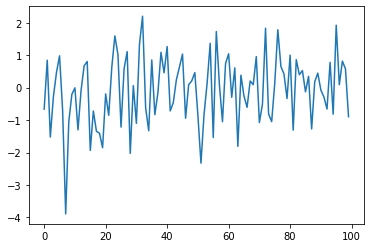

(array([ 1., 23., 52., 24.]),
 array([-3.89317607, -2.36949656, -0.84581706,  0.67786245,  2.20154196]),
 <a list of 4 Patch objects>)

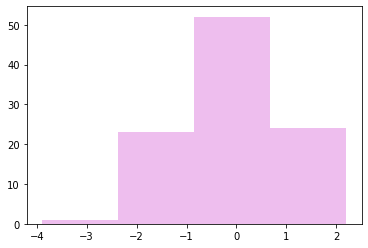

In [2]:
data=np.random.randn(100)
plt.plot(data)#折线图
plt.show()
#注意plt.show显示一次之后就会把之前的内容都抹掉
plt.hist(data,bins=4,color='#EEAEEE')#直方图

### 1.创建Figure来画图

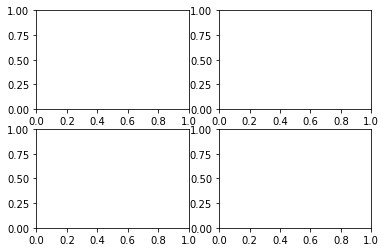

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D7F5AA1D0>,
      dtype=object)

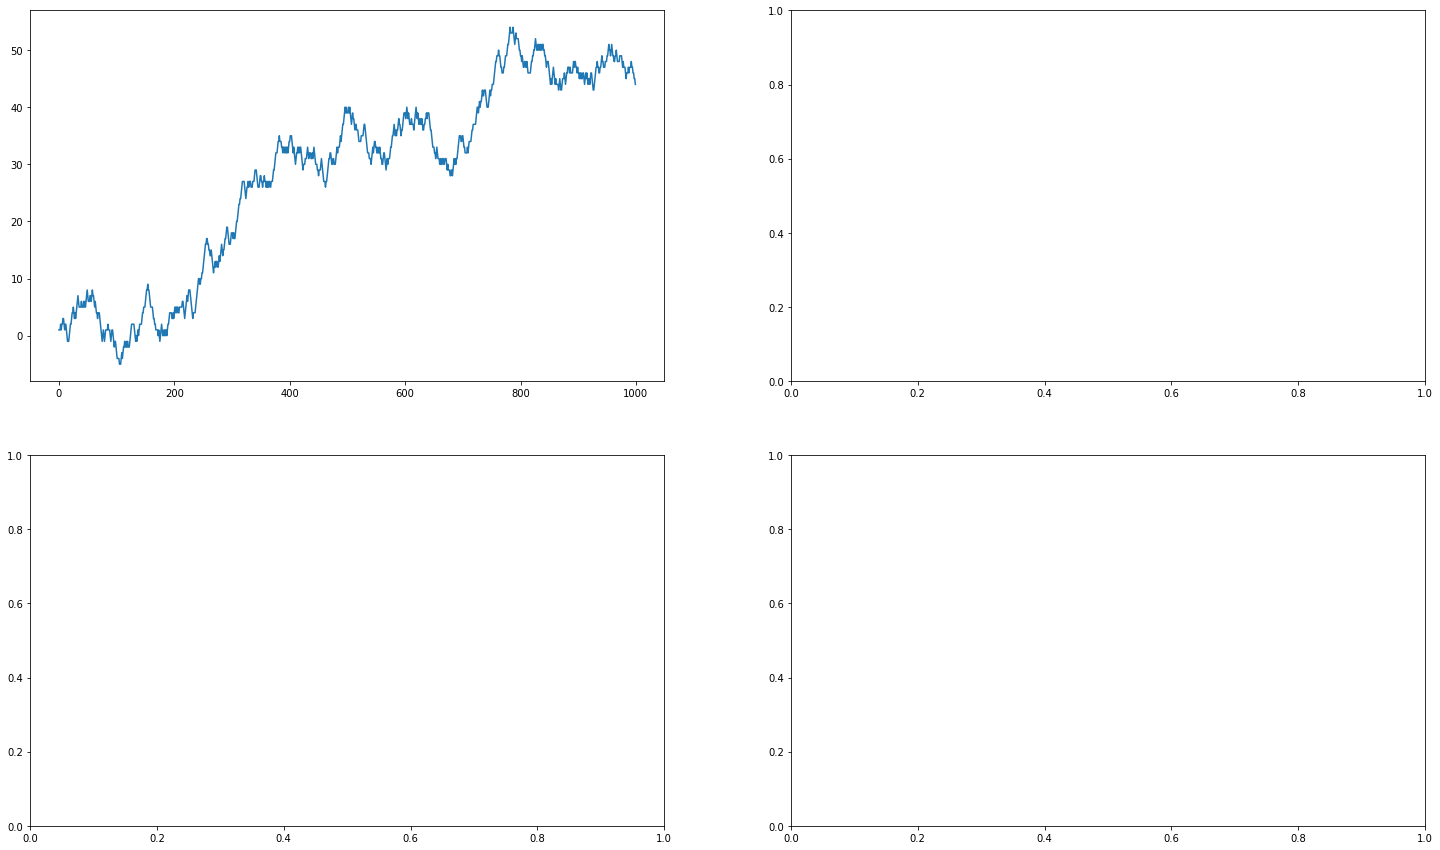

In [5]:
#更简单的创建figure的方法
#fig.subplots_adjust(wspace=0,hspace=0.1)
fig,axes=plt.subplots(2,2)
fig
fig.set_size_inches(w=25,h=15)
#可以看到axes是一个2x2的数组
axes
axes[0,0].plot(np.random.randint(-1,2,1000).cumsum())
plt.show()

subplots的参数列表:

| 参数 | 说明 |
| :-: | :-: |
| nrows | 行数 |
| ncols | 列数 |
| sharex | 共享x轴刻度 |
| sharey | 共享y轴刻度 |

### 2.颜色、标记和线型(color,marker,linestyle)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

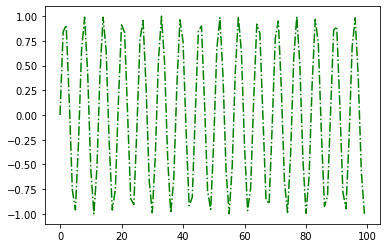

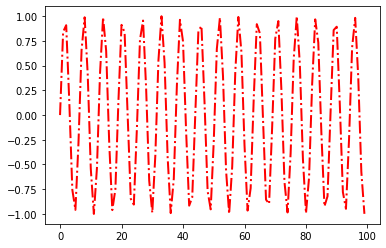

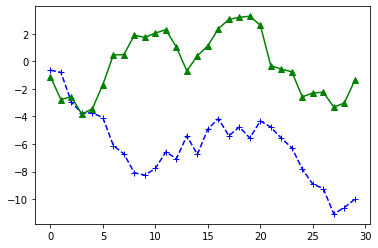

In [9]:
x=np.arange(100)
y=np.sin(x)
plt.plot(x,y,'g-.')
plt.show()
plt.plot(x,y,linestyle='-.',color='r',linewidth=2)
plt.show()

#注意位置参数必须放在关键字参数之前
plt.plot(np.random.randn(30).cumsum(),'b+--',np.random.randn(30).cumsum(),'g^-',label=['hello','world'])
plt.show()

<font color='#FF0000'>**APPENDIX：**</font>

1. [marker的参考网站](https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers)

2. [linestyle的参考网站](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle)

3. [RGB颜色表](https://www.114la.com/other/rgb.htm)


---

<center>常用marker表</center>
![常用marker表](https://raw.githubusercontent.com/anyeguiyuzhe/my_python_notebook/master/marker_chart.jpg)


### 3.刻度、标签和图例

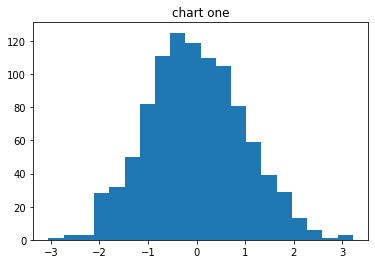

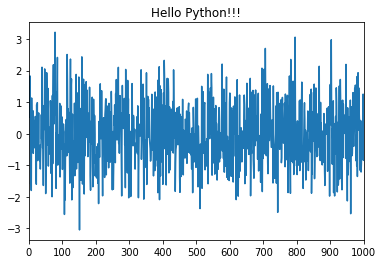

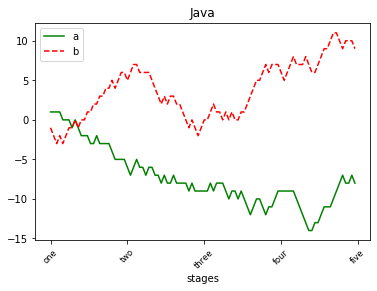

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=np.random.randn(1000)
plt.hist(a,bins=20)
plt.title('chart one')
plt.show()

#设置刻度
plt.plot(a)
plt.xlim([0,1000])
plt.xticks(np.linspace(0,1000,11))
#设置标题
plt.title('Hello Python!!!')
plt.show()

#或者是这样
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randint(-1,2,100).cumsum(),'g-',np.random.randint(-1,2,100).cumsum(),'r--')
#改变X轴刻度
ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels(['one','two','three','four','five'],rotation=45,fontsize='small')
ax.set_xlabel('stages')
ax.set_title('Java')
ax.legend(['a','b'],loc='best')
plt.show()

### 4.注解以及在subplot上绘图

>text(x, y, s, fontdict=None,**kwargs)

>annotate(s, xy, *args, **kwargs)

     ts_code trade_date   open   high    low  close  pre_close  change  \
0  000001.SZ   20190705  13.95  13.98  13.69  13.92      13.99   -0.07   
1  000001.SZ   20190704  14.01  14.28  13.88  13.99      14.01   -0.02   
2  000001.SZ   20190703  14.18  14.21  13.87  14.01      14.18   -0.17   
3  000001.SZ   20190702  13.88  14.24  13.86  14.18      13.93    0.25   
4  000001.SZ   20190701  14.01  14.18  13.87  13.93      13.78    0.15   

   pct_chg         vol       amount  
0  -0.5004   749196.09  1037357.175  
1  -0.1428   621292.52   873624.287  
2  -1.1989   769078.49  1076744.400  
3   1.7947  1052744.86  1481211.353  
4   1.0885   960636.00  1347792.874  


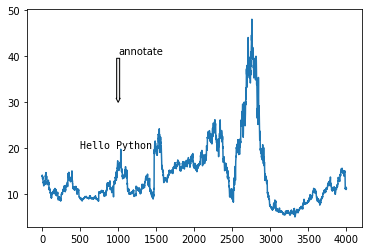

In [20]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import tushare as ts
pro=ts.pro_api()

start='20180505'
end='20181010'
info=pro.daily(ts_code='000001.SZ',start_data=start,end_data=end)
print(info.head(5))
plt.plot(info['close'],linestyle='-')
#写注释
plt.text(500,20,'Hello Python',family='monospace',fontsize=10)
plt.annotate('annotate',(1000,30),(1000,40),arrowprops=dict(facecolor='#EFEEEE',headwidth=4,width=3,headlength=4),horizontalalignment='left',verticalalignment='bottom')
plt.show()

- 图形的绘制

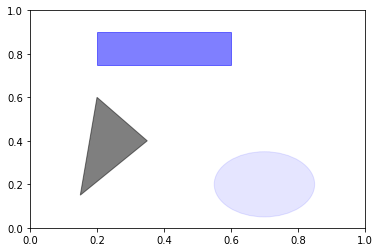

In [10]:
#要在图表中添加一个图形，你需要创建一个快对象，然后通过ax.add_patch(shp)添加
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#矩形
rec=plt.Rectangle((0.2,0.75),0.4,0.15,color='b',alpha=0.5)
cir=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.1)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='k',alpha=0.5)
ax.add_patch(rec)
ax.add_patch(cir)
ax.add_patch(pgon)
plt.show()


---

## 9.2 使用pandas和seaborn绘图

### 1.折线图

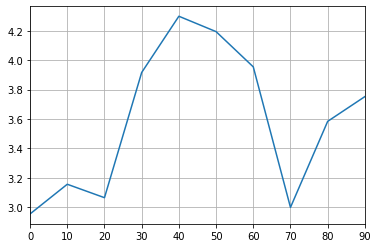

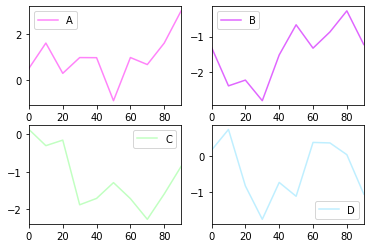

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#Series的plot方法
s=pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
#Series的索引会被传给matplotlib，用以绘制X轴
#参数
#plot(kind='line/bar/barh/kde',logy在y轴上使用对数标尺,rot选择标签刻度,grid显示轴网格线)
s.plot(grid=True)
plt.show()

#DataFrame的plot方法
#其他可选参数包括subplots,sharex,sharey,figsize,title,legend(bool),sort_columns
x,y=plt.subplots(2,2)
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=list('ABCD'),index=np.arange(0,100,10))
df.plot(ax=y,subplots=True,color=['#FF83FA','#E066FF','#C1FFC1','#BFEFFF'])
plt.show()

- 为折线图填充阴影-fill_between(x,y1,y2,color)

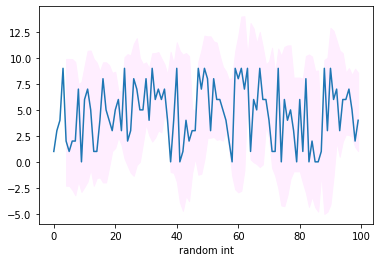

In [5]:
y=pd.Series(np.random.randint(0,10,100))
std=y.rolling(5).std()
mean=y.rolling(5).mean()
plt.plot(range(100),y)
plt.xlabel('random int')
plt.fill_between(range(100),mean-1.96*std,mean+1.96*std,color='#FFEEFF')
plt.show()

- 需要绘制2个y轴的情况

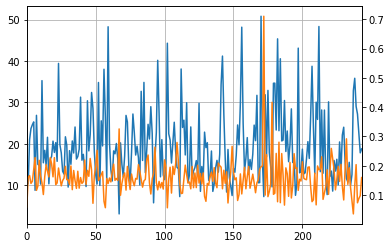

In [26]:
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path)[['total_bill','tip_pct']]
data.head()
data['total_bill'].plot(grid=True)
data['tip_pct'].plot(secondary_y=True,grid=True)


### 2.柱状图

#### 1.Series的柱状图

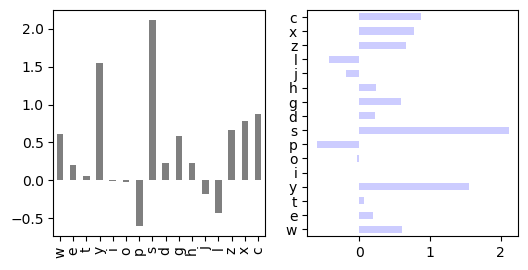

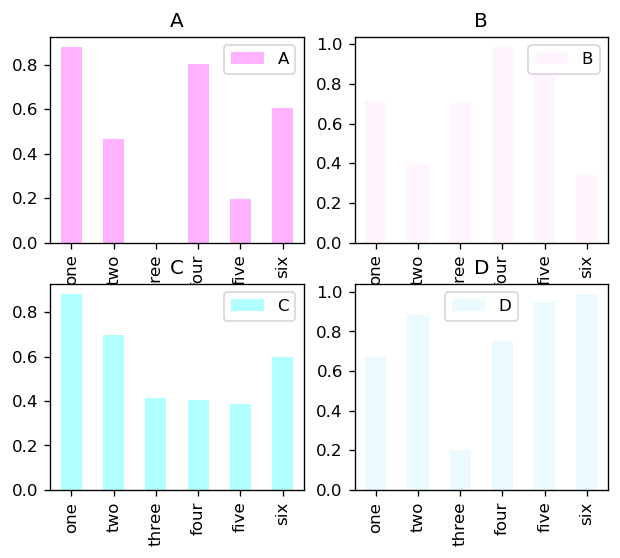

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plot.bar()和plot.barh()分别绘制水平和垂直的柱状图
fig,axes=plt.subplots(1,2,figsize=(6,3),dpi=100)
data=pd.Series(np.random.randn(16),index=list('wetyiopsdghjlzxc'))
data.plot.bar(ax=axes[0],color='k',alpha=0.5)
data.plot.barh(ax=axes[1],color='b',alpha=0.2)
plt.show()

fig,axes=plt.subplots(2,2,figsize=(6,5),dpi=120)
df=pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],
                columns=pd.Index(['A','B','C','D'],NAME='GENUS'))
#如果每列要画在不同的图形中，传入subplots=True
df.plot.bar(ax=axes,subplots=True,alpha=0.3,color=['#FF00FF','#FFE1FF','#00FFFF','#BFEFFF'])
plt.legend()
plt.show()

#### 2.DataFrame的柱状图

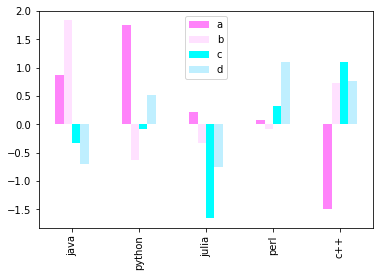

In [44]:
data=pd.DataFrame(np.random.randn(5,4),index=['java','python','julia','perl','c++'],columns=['a','b','c','d'])
data.plot(kind='bar',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'])

#### 3.堆积柱状图

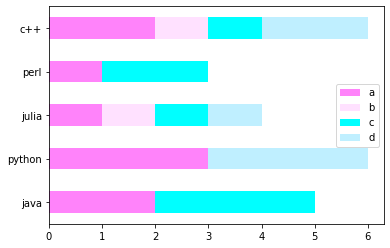

In [46]:
data=pd.DataFrame(np.random.randint(0,4,(5,4)),index=['java','python','julia','perl','c++'],columns=['a','b','c','d'])
data.plot(kind='barh',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'],stacked=True)

#### 4.龙卷风图(tornado)

([<matplotlib.axis.XTick at 0x197aa9496d8>,
 <a list of 2 Text xticklabel objects>)

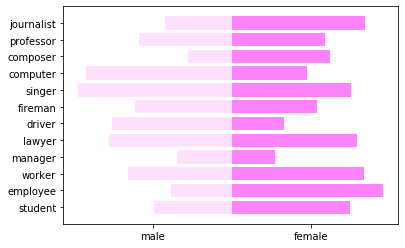

In [25]:
occupation=['student','employee','worker','manager','lawyer','driver','fireman','singer','computer','composer','professor','journalist']
count_f=np.random.randint(50,200,12)
count_m=np.random.randint(-200,-50,12)
plt.barh(np.arange(12),count_f,color='#FF83FA',label='female')
plt.barh(np.arange(12),count_m,color='#FFE1FF',label='male')
plt.yticks(np.arange(12),occupation)
plt.xticks([-100,100],['male','female'])

- 展示每天各种聚会规模所占的比例

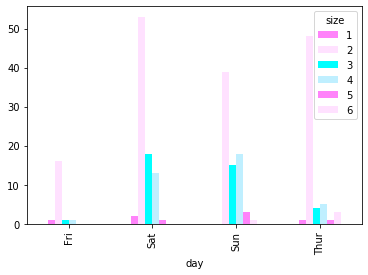

In [53]:
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path,index_col=None)
size=data.pivot_table(values='tip',index='day',columns='size',aggfunc='count')
size
size.plot(kind='bar',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'])

### 3.直方图和密度图

### 1.直方图

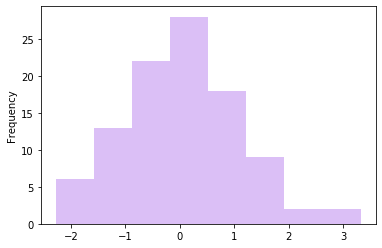

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#直方图和密度图
x=pd.Series(np.random.randn(100))
#或者是这样 x.plot.hist(bins=5)
x.plot(kind='hist',bins=8,color='#8A2BE2',alpha=0.3)

#### 2.堆叠的直方图

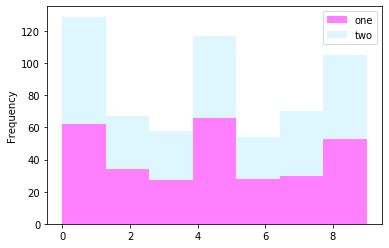

In [13]:
df=pd.DataFrame(np.random.randint(0,10,(300,2)),columns=['one','two'])
df.plot(kind='hist',alpha=0.5,bins=7,stacked=True,color=['#FF00FF','#BFEFFF'])

#### 3.按照某一指标分类画可比直方图(plot的by参数)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000197A9E10240>,
      dtype=object)

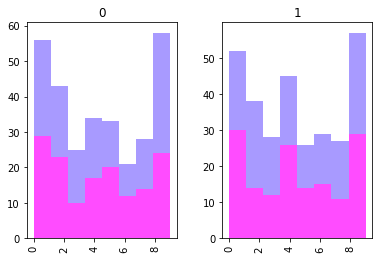

In [20]:
df=pd.DataFrame(np.random.randint(0,10,(300,2)),columns=['one','two'])
df['by']=np.random.randint(0,2,300)
df[['one','two']].hist(color=['#FF00FF','#8470FF'],by=df['by'],bins=8,stacked=True,alpha=0.7)

#### 4.密度图

>通过计算可能会产生观测数据的连续概率分布的估计而产生的

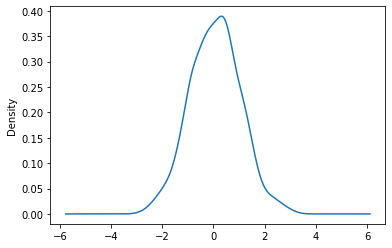

In [61]:
pd.Series(np.random.randn(1000)).plot(kind='density')

#### 4.seaborn画直方图和密度图

D:\python\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


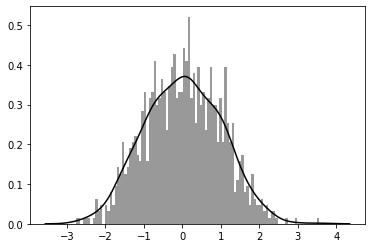

In [64]:
import seaborn as sns

a=np.random.randn(1000)
sns.distplot(a,bins=100,color='k')

- 散点图

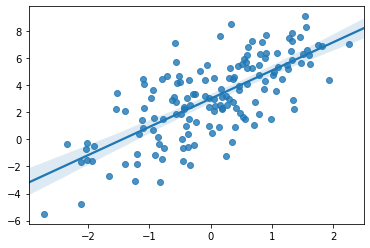

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x=np.random.randn(150)
y=x*2+3+np.random.randn(150)/0.5
sns.regplot(x,y)

- 分面网格图(facet grid)

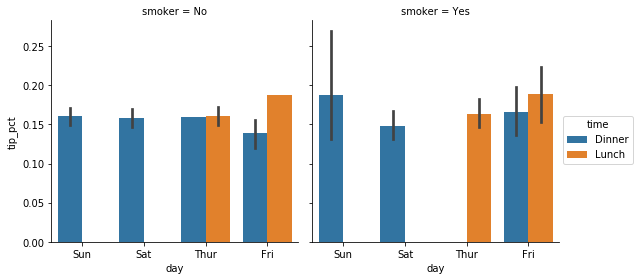

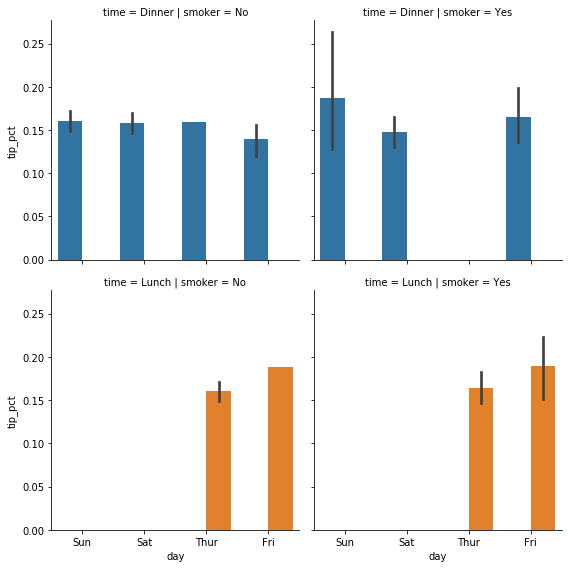

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#数据集有额外分组维度
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path)
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=data)
plt.show()
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',row='time',kind='bar',data=data)



- 箱线图，显示中位数，四分位数，异常值

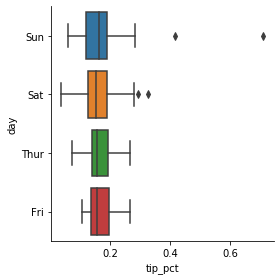

In [7]:
sns.factorplot(x='tip_pct',y='day',kind='box',data=data)

### 4.面积图

auth success  ( 聚宽第二届高频因子挑战赛正式启动，欢迎来战。详情查看大赛官方网页：http://suo.im/4SbA8A )


([<matplotlib.axis.YTick at 0x252a1053668>,
 <a list of 8 Text yticklabel objects>)

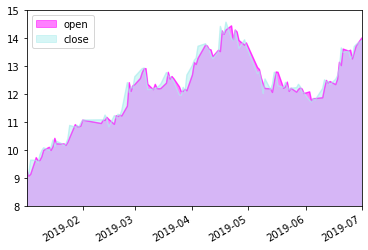

In [5]:
import jqdatasdk as jq
from datetime import datetime 

jq.auth('17750593771','17750593771mwy')
jq.get_query_count()
start=datetime(2019,1,1)
end=datetime(2019,7,1)
data=jq.get_price('000001.XSHE',start,end,frequency='daily')
data.head()
data[['open','close']].plot.area(stacked=False,color=['#FF00FF','#AEEEEE'])
plt.ylim([8,15])
plt.yticks(np.linspace(8,15,8))

### 5.饼图

>pie(x,explode偏移量,labels，colors,shadow=False)

([<matplotlib.patches.Wedge at 0x252a122b470>,
 [Text(0.2447730130080499, 1.0724207066739067, 'a'),
  Text(-1.1999999999999986, -5.617605406142127e-08, 'b'),
  Text(0.24477311341532126, -1.0724206837565986, 'c')],
 [Text(0.1335125525498454, 0.5849567490948581, '42.86%'),
  Text(-0.6999999999999992, -3.27693648691624e-08, '14.29%'),
  Text(0.13351260731744793, -0.5849567365945083, '42.86%')])

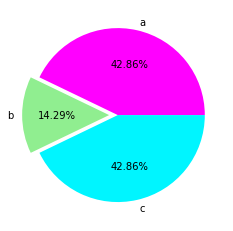

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s=pd.Series(np.random.randint(1,9,3),index=list('abc'))
explode=[0,0.1,0]
color=('#FF00FF','#90EE90','#00F5FF')
plt.pie(s,labels=s.index,shadow=False,explode=explode,colors=color,autopct='%1.2f%%')

### 6.词云

<class 'wordcloud.wordcloud.WordCloud'>


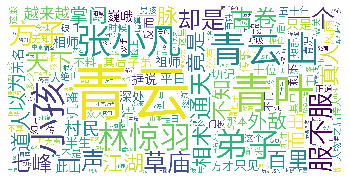

In [18]:
import jieba
from wordcloud import WordCloud
import pandas as pd
import pandas as pd
import numpy as np

path=r"D:\文档\Python Scripts\Python数据分析基础（第2版）数据\ch5\zhuxian.txt"
#这里用'utf-8'开头会出现\ufeff
with open(path,'r',encoding='utf-8-sig') as f:
    data=f.read()
word_list=' '.join(jieba.cut(data))
cloud=WordCloud(font_path=r"D:\文档\Python Scripts\siyuanheiti.ttf",background_color='white',width=2000,height=1000,max_words=200).generate(word_list)
print(type(cloud))
plt.imshow(cloud)
plt.axis('off')
plt.show()

以图片为模板

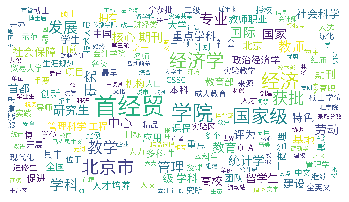

In [29]:
from imageio import imread
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

path=r"D:\文档\Python Scripts\Python数据分析基础（第2版）数据\ch5\cuebintro.txt"
img_path=r"D:\图片\壁纸\20180829005510.jpg"

#这里用'utf-8'开头会出现\ufeff
with open(path,'r',encoding='utf-8-sig') as f:
    data=f.read()
word_list=' '.join(jieba.cut(data))
coloring=imread(img_path)
stw=STOPWORDS.copy()
stw.add(u'人')
stw.add(u'的')
stw.add(u'等')
cloud=WordCloud(font_path=r"D:\文档\Python Scripts\siyuanheiti.ttf",background_color='white',width=2000,\
                height=1000,max_words=200,max_font_size=180,scale=2,mask=coloring,stopwords=stw).generate(word_list)
ImageColorGenerator(coloring)
plt.imshow(cloud)
plt.axis('off')
plt.show()